 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [127]:
from scipy import stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def check_normality(data, alpha=0.05):
    stat, p = st.shapiro(data)
    print(f"stat = {stat:.3f}, p = {p:.3f}")
    if p < alpha: # условие статистической значимости
        print("Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально\n")
    else:
        print("Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально\n")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

/Users/eugene_ivanov/PycharmProjects/ds_python/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 150000.
  res = hypotest_fun_out(*samples, **kwds)


stat = 1.000, p = 1.000
Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально

stat = 1.000, p = 0.905
Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально

stat = 0.170, p = 0.680
Levain: Не отклоняем нулевую гипотезу >> Вариация групп не значительна

stat = 28.314, p = 0.000
T-test: Отклоняем нулевую гипотезу >> Различие между выборками значительно



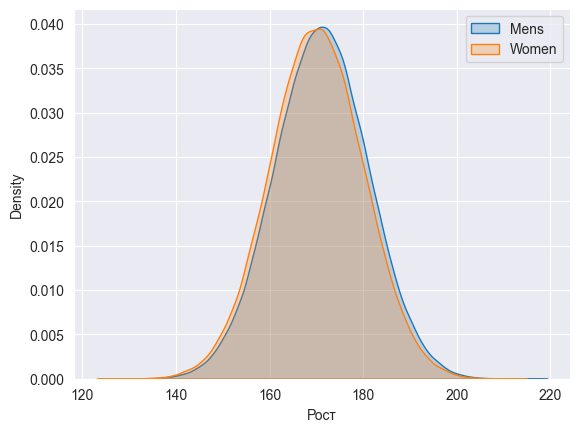

stat = 28.923, p = 0.000
T-test: Отклоняем нулевую гипотезу >> Различие между выборками значительно



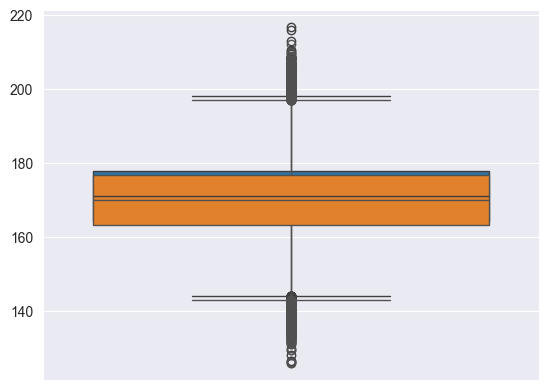

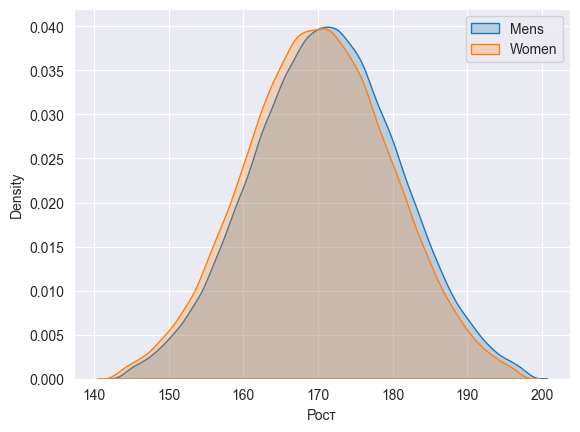

((array([-4.43261757, -4.23754726, -4.13157643, ...,  4.13157643,
          4.23754726,  4.43261757]),
  array([143.04657615, 143.05112386, 143.05268299, ..., 196.91500078,
         196.9180303 , 196.92420687])),
 (np.float64(9.68858660950022),
  np.float64(169.9957269369314),
  np.float64(0.9992184957579804)))

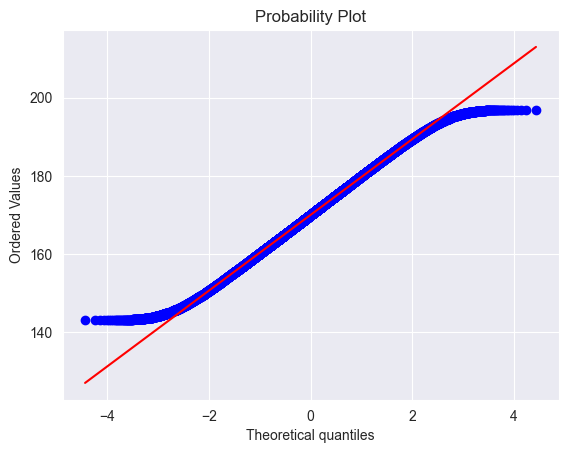

In [128]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

for group in [mens, women]:
    check_normality(group)

# проверяем равенство вариаций выборок по тесту Левена
def check_variation(data_1, data_2, *args):
    stat, p = st.levene(data_1, data_2, *args)
    print(f"stat = {stat:.3f}, p = {p:.3f}")
    if p < 0.05:
        print("Levain: Отклоняем нулевую гипотезу >> Вариация групп значительна\n")
    else:
        print("Levain: Не отклоняем нулевую гипотезу >> Вариация групп не значительна\n")
        
check_variation(mens, women)

# t-test
def t_test(data_1, data_2, alpha=0.05):
    stat, p = st.ttest_ind(data_1, data_2)
    print(f"stat = {stat:.3f}, p = {p:.3f}")
    if p < alpha:
        print("T-test: Отклоняем нулевую гипотезу >> Различие между выборками значительно\n")
    else:
        print("T-test: Не отклоняем нулевую гипотезу >> Различие между выборками не значительно\n")
        
t_test(mens, women, 0.001)

plt.figure()
sns.kdeplot(mens, label="Mens", fill=True)
sns.kdeplot(women, label="Women", fill=True)
plt.xlabel("Рост")
plt.legend()
plt.show()

sns.boxplot(mens)
sns.boxplot(women)

def data_wo_outliers(arr):
    Q1 = np.quantile(arr, 0.25)
    Q3 = np.quantile(arr, 0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_clean = (arr >= lower_bound) & (arr <= upper_bound)
    
    filtered_arr = arr[outliers_clean]
    
    return filtered_arr

mens = data_wo_outliers(mens)
women = data_wo_outliers(women)

t_test(mens, women, 0.001)

plt.figure()
sns.kdeplot(mens, label="Mens", fill=True)
sns.kdeplot(women, label="Women", fill=True)
plt.xlabel("Рост")
plt.legend()
plt.show()

plt.figure()
st.probplot(women, plot=plt)

1) t-test чувствителен к большим выборкам, поэтому для него средняя разница выборок может являться значительной, в то время как визуально она таковой не выглядит. К тому же, вариация групп незначительна, что делает даже маленькие отклонения от средней статистичеки значимыми.
2) Почистим данные от выбросов - возьмем данные между первым и третьим квантилями по обеим группам.
3) Даже в рамках вариативности между 1 и 3 квантилями - t-test тем не менее определяет отклонения данных от средней как статистически значимые и поэтому средняя разница выборок определена как значительная

Вывод: результат t-test не является практически полезным так как относительно здавого смысла среднее превышение роста группы mens на 1 см роста группы women - не является практически значимым. (Если уменьшить размер выборки до 150, то t-test показывает подтверждение нулевой гипотезы) 

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

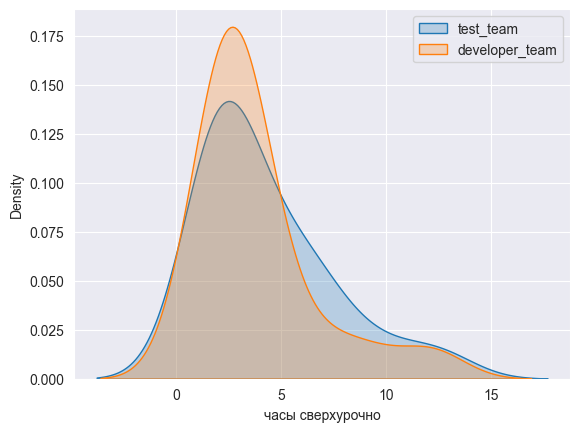

stat = 0.825, p = 0.005
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально

stat = 0.753, p = 0.000
Shapiro: Отклоняем нулевую гипотезу >> Данные распределены не нормально

stat = 151.500, p = 0.823
M_W_test: Не отклоняем нулевую гипотезу >> Данные распределены вероятно одинаково



In [129]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

plt.figure()
sns.kdeplot(test_team, label="test_team", fill=True)
sns.kdeplot(developer_team, label="developer_team", fill=True)
plt.xlabel("часы сверхурочно")
plt.legend()
plt.show()

for group in [test_team, developer_team]:
    check_normality(group)
    
# так как данные распределены не нормально - используем непараметрический метод для проверки гипотезы - u_test
def u_test(data_1, data_2, alpha=0.05):
    stat, p = st.mannwhitneyu(data_1, data_2)
    print(f"stat = {stat:.3f}, p = {p:.3f}")
    if p < alpha:
        print("M_W_test: Отклоняем нулевую гипотезу >> Данные распределены вероятно не одинаково\n")
    else:
        print("M_W_test: Не отклоняем нулевую гипотезу >> Данные распределены вероятно одинаково\n")
        
u_test(test_team, developer_team)        
        
         

Вывод: На основании непараметрического теста Манна-Уитни делаем заключение, что разница в часах при оценке переутомления 2-х команд не является статистически значимой.

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

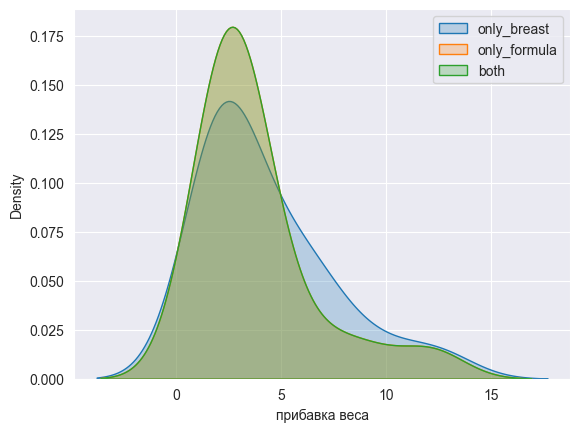

only_breast
stat = 0.951, p = 0.469
Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально

only_formula
stat = 0.976, p = 0.888
Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально

both
stat = 0.975, p = 0.797
Shapiro: Не отклоняем нулевую гипотезу >> Данные распределены нормально

stat = 0.266, p = 0.767
Levain: Не отклоняем нулевую гипотезу >> Вариация групп не значительна

stat = 26.701, p = 0.000
Anova: Отклоняем нулевую гипотезу >> Различие между выборками значительно

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


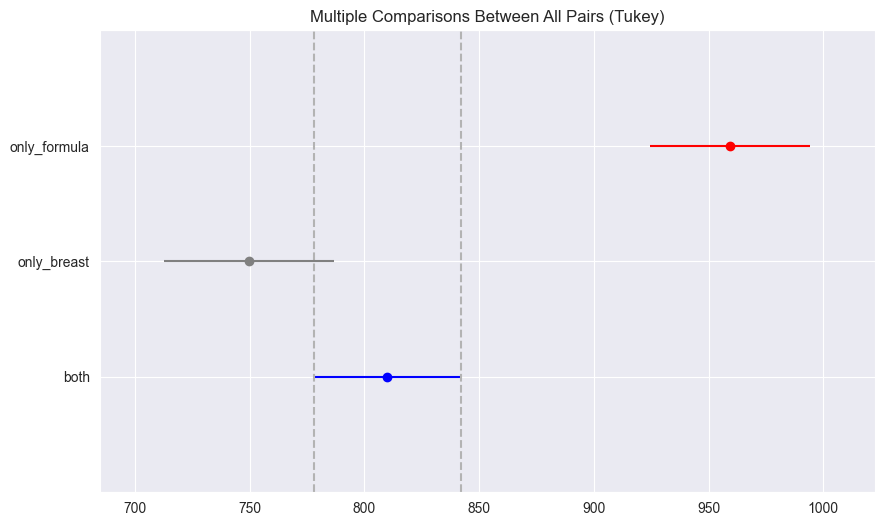

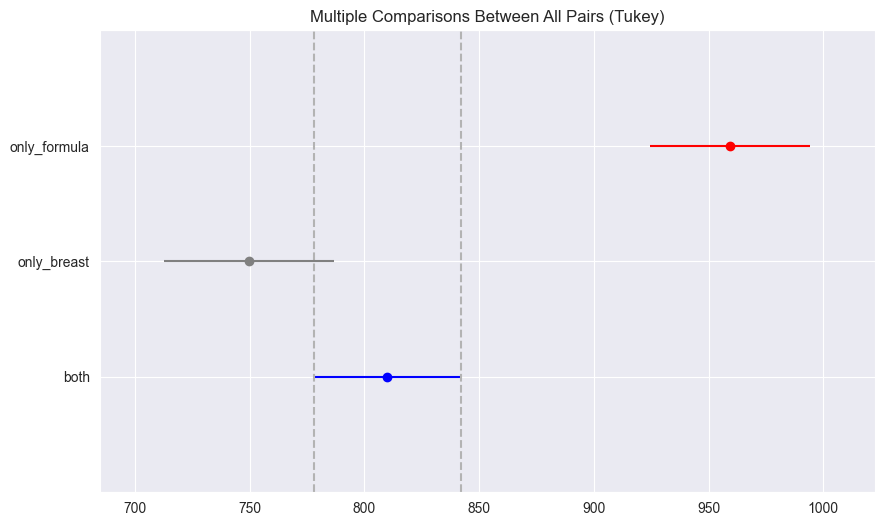

In [130]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

group_names = ['only_breast', 'only_formula', 'both']

plt.figure()
sns.kdeplot(test_team, label="only_breast", fill=True)
sns.kdeplot(developer_team, label="only_formula", fill=True)
sns.kdeplot(developer_team, label="both", fill=True)
plt.xlabel("прибавка веса")
plt.legend()
plt.show()

for group_name, group in zip(group_names, [only_breast, only_formula, both]):
    print(f"{group_name}")
    check_normality(group)
    
# так как данные по всем группам распределены нормально - используем anova_test для определения статистической значимости среднемесячного прироста, но сначала проверим соответствие вариативности 3х выборок (тест Левейна)
check_variation(only_breast, only_formula, both)

# так как вариация 3х групп незначительна - переходим к anova_test
def anova_test(data_1, data_2, data_3, alpha=0.05):
    fvalue, p = st.f_oneway(data_1, data_2, data_3)
    print(f"stat = {fvalue:.3f}, p = {p:.3f}")
    if p < alpha:
        print("Anova: Отклоняем нулевую гипотезу >> Различие между выборками значительно\n")
    else:
        print("Anova: Не отклоняем нулевую гипотезу >> Различие между выборками не значительно\n")
        
anova_test(only_breast, only_formula, both)        

# так как различия между выборками значительны - используем критерий Тьюки для множественного сравнения
def tukeys_test(data_1, data_2, data_3, alpha=0.05):
    data = np.concatenate([data_1, data_2, data_3])
    labels = ['only_breast'] * len(data_1) + ['only_formula'] * len(data_2) + ['both'] * len(data_3)
    
    tukey = pairwise_tukeyhsd(data, labels, alpha=alpha)
    print(tukey)
    return tukey

tukey_res = tukeys_test(only_breast, only_formula, both)

tukey_res.plot_simultaneous(comparison_name='both')

Вывод: установлена значительная разница в среднемесячной прибавке веса у групп (only_breast и only_formula) и групп (both и only_formula). Соответственно наибольшая прибавка веса идет у групп only_formula и both. Вероятно стоит обратить внимание на методику кормления (в категории both - неравномерные пропорции), либо на то, что при взаимодействии с органическим веществом смесь каким-то образом теряет часть питательных своиств.

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [131]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

NameError: name 'pd' is not defined

<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.